# Лабораторна робота 1. 
# Шифр Вiженера. Частотний криптоаналiз
# Виконав студент 3-го курсу 
# Комп'ютерної математики 2 підгрупи
# Місьонг Владислав Вікторович


In [53]:
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from math import log10
from collections import Counter
from itertools import permutations

## Л1.1 - Побудуйте гiстограму частот появи лiтер в текстi.

In [54]:
books = ['Vidmak.-Ostannie-bazhannia-Andzhiei-Sapkovskii.txt']

### Прибираємо всі пробіли, пунктуацію та цифри з введенного тексту

In [56]:
# Зібрати усі тексти зі списку книг у один рядок
all_books = ""
for book in books:
    with open(book, encoding="utf8") as f:
        all_books += f.read()

# Створити список допустимих символів
allowed_chars = 'АБВГДЕЄЖЗИІЇЙКЛМНОПРСТУФХЦЧШЩЬЮЯҐ'

# Видалити всі символи, які не є допустимими
plain_text = ''.join(c for c in all_books.upper() if c in allowed_chars)

<ul>
    <li> <h3> Підраховуємо входження кожної літери в текст. На виході отримаємо словник, де ключ - це літера, а значення - кількість входжень</h3> </li>
</ul>

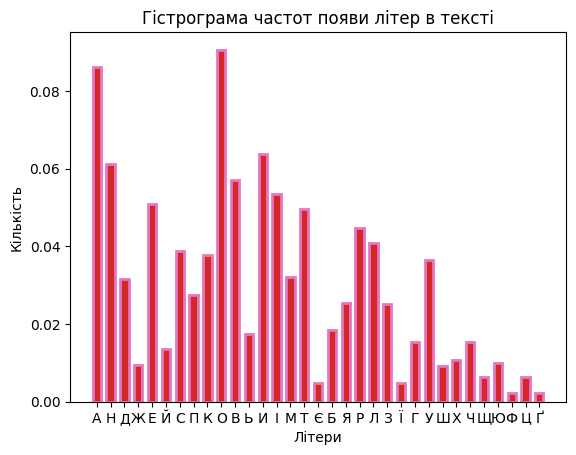

In [57]:
c = Counter(plain_text) #підрахунок кількості кожної літери в тексті

total_letters = sum(c.values()) #загальна кількість літер

relative_frequencies = {}
for letter, count in c.items():
    relative_frequencies[letter] = count / total_letters

plt.bar(*zip(*relative_frequencies.items()), width = 0.6, color='tab:red', 
        edgecolor="tab:pink", linewidth = 2) #генеруємо гістограму з отриманих відносних частот кожної літери

plt.title("Гістрограма частот появи літер в тексті")
plt.xlabel("Літери")
plt.ylabel("Кількість")

plt.show()

## Л1.2 - Реалiзуйте алгоритм шифрування Вiженера


In [58]:
ukr_alphabet = "АБВГҐДЕЄЖЗИІЇЙКЛМНОПРСТУФХЦЧШЩЬЮЯ"

def generate_key(message, key):   # Подовження ключа до довжини повідомлення
    key = key * (len(message) // len(key)) + key[:len(message) % len(key)]
    return key

def encryption(plaintext, key):
    key = generate_key(plaintext, key)  # Генерація ключа для шифрування
    ciphertext = ''
    
    for i in range(len(plaintext)):
        char = plaintext[i]
        if char in ukr_alphabet:
            char_index = (ukr_alphabet.index(char) + ukr_alphabet.index(key[i])) % len(ukr_alphabet)
            ciphertext += ukr_alphabet[char_index]
        else:
            ciphertext += char
    return ciphertext

def decryption(ciphertext, key):
    key = generate_key(ciphertext, key)  # Генерація ключа для дешифрування
    plaintext = ''
    
    for i in range(len(ciphertext)):
        char = ciphertext[i]
        if char in ukr_alphabet:
            char_index = (ukr_alphabet.index(char) - ukr_alphabet.index(key[i])) % len(ukr_alphabet)
            plaintext += ukr_alphabet[char_index]
        else:
            plaintext += char
    return plaintext

In [84]:
plain_text = input("Введіть текст для шифрування: ")

# Видаляємо з тексту всі символи, які не належать до українського алфавіту
allowed_chars = 'АБВГДЕЄЖЗИІЇЙКЛМНОПРСТУФХЦЧШЩЬЮЯҐ'
plain_text = ''.join(c for c in plain_text.upper() if c in allowed_chars)

key = input("Введіть ключ для шифрування: ")

# Перевіряємо, чи довжина ключа менша за довжину початкового повідомлення
while(len(key) > len(plain_text)):
    print("\nДовжина ключа має бути менша за довжину початкового повідомлення")
    key = input("Введіть ключ для шифрування: ")

Введіть текст для шифрування: Допомога кожному з нас
Введіть ключ для шифрування: весна


In [85]:
plain_text = plain_text.upper()
key = key.upper()

cipher_text = encryption(plain_text, key)
print("Зашифрований текст:", cipher_text)

deciphered_text = decryption(cipher_text, key)
print("Дешифрований текст:", deciphered_text)

Зашифрований текст: ЄФЄВМРЗСЮОИУЕАУІУСД
Дешифрований текст: ДОПОМОГАКОЖНОМУЗНАС


In [86]:
print(plain_text, key)

ДОПОМОГАКОЖНОМУЗНАС ВЕСНА


##Л1.3 - Проведiть криптоаналiз шифру Вiженера i розшифруйте запропонований крипто-текст, не знаючи секретного ключа

<ul>
    <li> <h3> Описаний нижче метод виконується аналогічно до поданого варіанту у підказці до лабораторної роботи, тому я більш детально розібрав його, замінивши на українські матеріали</h3> </li>
</ul>

In [87]:
class ngram_score(object):
    def __init__(self, ngramfile, sep=' '):
        """
        Ініціалізація класу з використанням збережених n-грам.
        """

        # Створення словника для збереження n-грам та їх кількості
        self.ngrams = {}

        # Відкриваємо файл з n-грамами та заповнюємо словник self.ngrams
        with open(ngramfile, 'r', encoding='utf-8') as file:
            for line in file:
                # В рядку між ключем та значенням можуть бути табуляції, які ми замінюємо на пробіли
                line = line.replace("\t", " ")
                # Розділяємо рядок на ключ та кількість зустрічей
                key, count = line.split(sep)
                # Зберігаємо ключ у словник та конвертуємо кількість зустрічей у числове значення
                self.ngrams[key] = int(count)

        # Зберігаємо довжину ключа
        self.L = len(key)
        # Знаходимо загальну кількість n-грам
        self.N = sum(self.ngrams.values())

        # Обчислюємо логарифмічне значення відносної частоти кожного n-граму та зберігаємо в словник self.ngrams
        for key in self.ngrams.keys():
            self.ngrams[key] = log10(float(self.ngrams[key]) / self.N)

        # Зберігаємо підлогарифмічне значення мінімальної можливої частоти
        self.floor = log10(0.01 / self.N)

    def score(self,text):
        """
        Функція score знаходить суму логарифмічних значень відносної частоти
        n-грамів, що зустрічаються у тексті text.
        """
        score = 0
        # Завантаження функції __getitem__() для зручності використання
        ngrams = self.ngrams.__getitem__
        # Проходимо по усім підрядкам тексту довжиною self.L
        for i in range(len(text)-self.L+1):
            # Якщо n-грам знаходиться у словнику, додаємо
            if text[i:i+self.L] in self.ngrams: score += ngrams(text[i:i+self.L])
            else: score += self.floor          
        return score

In [88]:
qgram = ngram_score('ua_quadragrams.txt') # об'єкт для розрахунку квадраграмів
trigram = ngram_score('ua_triagrams.txt') # об'єкт для розрахунку триграмів
ctext = cipher_text # зашифрований текст
ctext = re.sub(r'[^А-ЩЬЮЯЄІЇҐ]','',ctext.upper()) # видалення з тексту символів, що не є українськими літерами

In [89]:
# клас для зберігання та вибірки n-найкращих результатів
class nbest(object):
    def __init__(self, N=1000):
        self.store = []
        self.N = N

    # додавання нового елементу у список результатів
    def add(self, item):
        self.store.append(item)
        self.store.sort(reverse=True)
        self.store = self.store[:self.N]

    # отримання елементу за індексом
    def __getitem__(self, k):
        return self.store[k]

    # отримання довжини списку результатів
    def __len__(self):
        return len(self.store)


N = 100 # константа для зберігання кількості найкращих результатів
for KLEN in range(3, 20): # перебираємо довжину ключа від 3 до 19
    rec = nbest(N) # створюємо об'єкт для зберігання n-найкращих результатів

    # перебираємо всі можливі комбінації перших трьох символів ключа
    for i in permutations('АБВГҐДЕЄЖЗИІЇЙКЛМНОПРСТУФХЦЧШЩЬЮЯ', 3):
        key = ''.join(i) + 'А'*(KLEN-len(i)) # формуємо ключ довжиною KLEN
        pt = decryption(ctext, key) # розшифровуємо текст за допомогою ключа
        score = 0
        # обчислюємо сумарний бал за триграми
        for j in range(0, len(ctext), KLEN):
            score += trigram.score(pt[j:j+3])
        # додаємо результат у список n-найкращих
        rec.add((score, ''.join(i), pt[:30]))

    next_rec = nbest(N)
    for i in range(0,KLEN-3):
        # проходимо по всім ключам з rec і додаємо символ до кожного ключа 
        # з алфавіту 'АБВГҐДЕЄЖЗИІЇЙКЛМНОПРСТУФХЦЧШЩЬЮЯ'
        for k in range(N):
            for c in 'АБВГҐДЕЄЖЗИІЇЙКЛМНОПРСТУФХЦЧШЩЬЮЯ':
                # формуємо повний ключ з попередньої ітерації та нового символу
                key = rec[k][1] + c
                fullkey = key + 'А'*(KLEN-len(key))
                # дешифруємо текст за допомогою нового ключа
                pt = decryption(ctext, fullkey)
                score = 0
                for j in range(0,len(ctext),KLEN):
                    score += qgram.score(pt[j:j+len(key)])
                # додаємо у next_rec кращі результати дешифрування
                next_rec.add((score,key,pt[:30]))
        rec = next_rec
        next_rec = nbest(N)
    # знаходимо кращий ключ
    bestkey = rec[0][1]
    pt = decryption(ctext, bestkey)
    bestscore = qgram.score(pt)
    for i in range(N):
        pt = decryption(ctext, rec[i][1])
        score = qgram.score(pt)
        if score > bestscore:
            bestkey = rec[i][1]
            bestscore = score      
    # виводимо результати
    print('Найкращий скор:', bestscore, 'довжина ключа', KLEN,':"'+ bestkey +'",', decryption(ctext, bestkey))

Найкращий скор: -102.4216592920678 довжина ключа 3 :"ФАР", МФРІМАОСІЧИГЛАГРУБК
Найкращий скор: -97.8974155650357 довжина ключа 4 :"ЕОУС", БЕНКИВПАХАРВАЛАУНГЛ
Найкращий скор: -76.77084752930836 довжина ключа 5 :"ВЕСНА", ДОПОМОГАКОЖНОМУЗНАС
Найкращий скор: -85.73580387253219 довжина ключа 6 :"ХИТАДА", ЛКОВІРНІЗОДУКУБІОСЙ
Найкращий скор: -84.93685030165909 довжина ключа 7 :"ДЮБАЕЕФ", ВЦЕВИКОМАНИНАЗОЙТСЯ
Найкращий скор: -77.36087735850076 довжина ключа 8 :"ЩЄДЩЩРРІ", ІНВЕРАТИВІДЧИЙГАЧКА
Найкращий скор: -70.68641660899138 довжина ключа 9 :"ВҐБСЮДФДЙ", ДРЕКОЛОМОМЕТОВОРОЖГ
Найкращий скор: -66.2765965561345 довжина ключа 10 :"ВЕСЇБСҐСМЇ", ДОПУЛЯДАЛЕЖНОСТУПАТ
Найкращий скор: -61.260248890138115 довжина ключа 11 :"АПУВТГЮАЗОС", ЄДНАЧНІСТАТУРИСТРУД
Найкращий скор: -62.50494104041687 довжина ключа 12 :"ХЙДЗДОСФНАЧЇ", ЛІВЦІВСЬКОМІКРОВОГН
Найкращий скор: -54.98542460036218 довжина ключа 13 :"ЮЕДВЯРЧФКАТБЕ", ЗОВАНАЛЬНОСТАВНЕСТО
Найкращий скор: -56.86862276786914 довжина ключа 14 :"ҐФДВЯВЄИЦЯХСШШ", ГА